# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [432]:
import pandas as pd

## imports for Python, Pandas

In [433]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [434]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [435]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [436]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [437]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [438]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects


In [439]:
#Load the file as dataframe.
json_df = pd.read_json('data/world_bank_projects.json')

#Create a groupby object to count number of times that each country appears.
df1=json_df.groupby('countryshortname').count()

#Sort and present as a list.
df1['_id'].sort_values(ascending=False)[0:10]

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: _id, dtype: int64

In [440]:
#load file as JSON object.
file1=json.load((open('data/world_bank_projects.json')))

#Normalize
file2=json_normalize(file1)

#Apply same methodology
file2.groupby('countryshortname').count()['_id.$oid'].sort_values(ascending=False)[0:10]

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: _id.$oid, dtype: int64

2. Find the top 10 major project themes (using column 'mjtheme_namecode')


In [441]:
#load file as json
file3=json_normalize(file1,'mjtheme_namecode')
file3['name'].value_counts()[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [442]:
import numpy as np
#copy file 3
file4=file3.copy()
#change code to an integer type
file4['code']=file4['code'].astype('int')
#Replace spaces with NA
file4=file4.replace(r'^$', np.nan, regex=True)
#add extra column to ease sorting
file4['extra']=1
#Sort values by code and name, so the NA values are at the end of the lists
file4=file4.sort_values(['code', 'name'])
#Forward fill NA
file4=file4.fillna(method='ffill')
#Check groups to verify all NAs have been filled. 
file4=file4.fillna('test')
file4=file4.groupby('code')['name'].value_counts()
file4.sort_values(ascending=False)[:10]

code  name                                        
11    Environment and natural resources management    250
10    Rural development                               216
8     Human development                               210
2     Public sector governance                        199
6     Social protection and risk management           168
4     Financial and private sector development        146
7     Social dev/gender/inclusion                     130
5     Trade and integration                            77
9     Urban development                                50
1     Economic management                              38
Name: name, dtype: int64

In [443]:
#alternative method. Create a dictionary of values and map to a dataframe column

#copy file 3
file5=file3.copy()

#change code to an integer type
file5['code']=file5['code'].astype('int64')

#Replace spaces with NA
file5=file5.replace(r'^$', np.nan, regex=True)

#add extra column to ease sorting
file5['extra']=1

#Sort values by code and name, so the NA values are at the end of the lists
file5=file5.sort_values(['code', 'name'])

#groupby to pull code/name pairs
file6=file5.groupby('code')['name'].value_counts()

#build data_frame
file6=file6.to_frame()

#rename column to avoid problems
file6.columns=['extra']

#reset index and drop columns
file6=file6.reset_index().drop(columns=['extra'])

#build dictionary
dictn=dict(zip(file6['code'],file6['name']))

#apply dictionary
file5['name']=file5['code'].map(dictn)

#fill na and pull pairs
file5=file5.fillna('test')
file5=file5.groupby('code')['name'].value_counts()
file5=file5.sort_values(ascending=False)[0:10]
file5

code  name                                        
11    Environment and natural resources management    250
10    Rural development                               216
8     Human development                               210
2     Public sector governance                        199
6     Social protection and risk management           168
4     Financial and private sector development        146
7     Social dev/gender/inclusion                     130
5     Trade and integration                            77
9     Urban development                                50
1     Economic management                              38
Name: name, dtype: int64

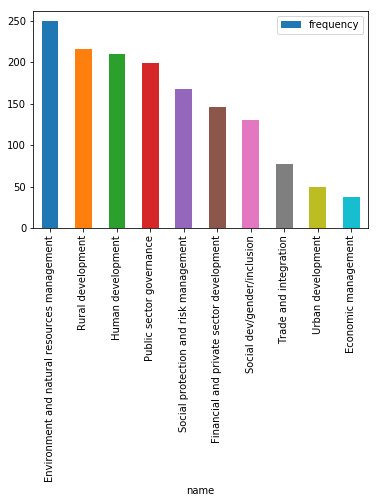

In [444]:
#clean and plot
import matplotlib.pyplot
file5=file5.to_frame()
file5.columns=['frequency']
file5.reset_index().plot(kind='bar',x='name',y='frequency')